In [5]:
import numpy as np
import xarray as xr
import xmitgcm as xm
import xgcm
from matplotlib import gridspec as gridspec
from matplotlib import pyplot as plt
import MITgcmutils as mutil

import sys
sys.path.append('/home/daanr/diffusion/tools/')
import ACC_tools
%config InlineBackend.figure_format = 'retina'

# Dataset preparation

In [3]:
ds_stats = ACC_tools.mitgcm_stat_xr("/projects/0/topios/hydrodynamic_data/MITgcm/ACC_channel/ACC_ridge_fine_spinup/dynStDiag.0000000000.txt", "/projects/0/topios/hydrodynamic_data/MITgcm/ACC_channel/ACC_ridge_fine_spinup/RC")

In [4]:
ds = xm.open_mdsdataset(
    data_dir="/projects/0/topios/hydrodynamic_data/MITgcm/ACC_channel/ACC_ridge_fine_spinup/Diags",
    prefix=["state", "2D_diags"],
    read_grid=True,
    geometry="cartesian",
)

In [4]:
# Correct timestamps
ds = ds.assign_coords(
    {"time": ds["time"].values.astype("timedelta64[s]").astype("float64") * 250}
)
ds["time"].attrs["units"] = "seconds since 1900-01-01"
ds["time"].attrs["calendar"] = "360_day"
ds = xr.decode_cf(ds)

In [5]:
grid = xgcm.Grid(ds, periodic=['X'], boundary='extend', metrics={
        ('X',): ['dxC', 'dxG'], # X distances
        ('Y',): ['dyC', 'dyG'], # Y distances
        ('Z',): ['drC', 'drF'], # Z distances
        ('X', 'Y'): ['rA', 'rAz', 'rAs', 'rAw'] # Areas
    })

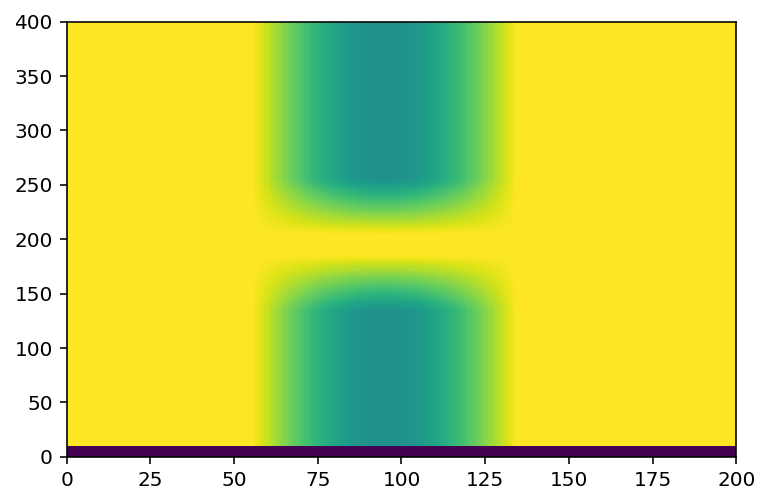

In [7]:
depth = mutil.rdmds("/projects/0/topios/hydrodynamic_data/MITgcm/ACC_channel/ACC_ridge_fine_spinup/Depth")
plt.pcolormesh(depth)

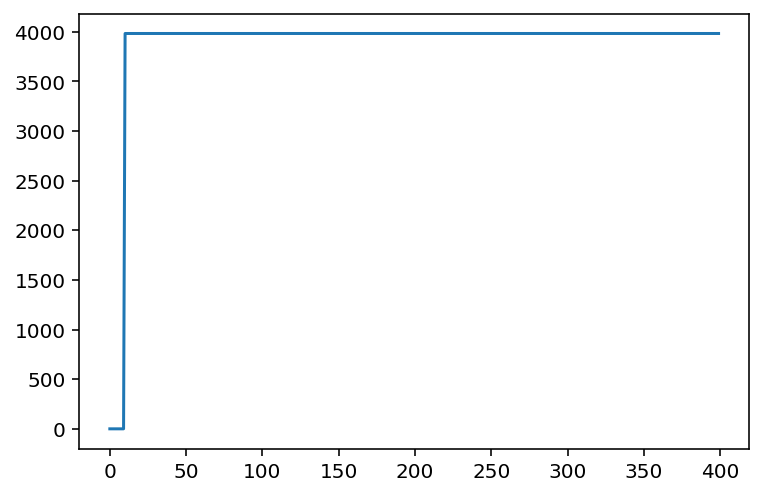

In [12]:
plt.plot(depth[:, 0])

# Analysis
## Surface 
### Surface temperature

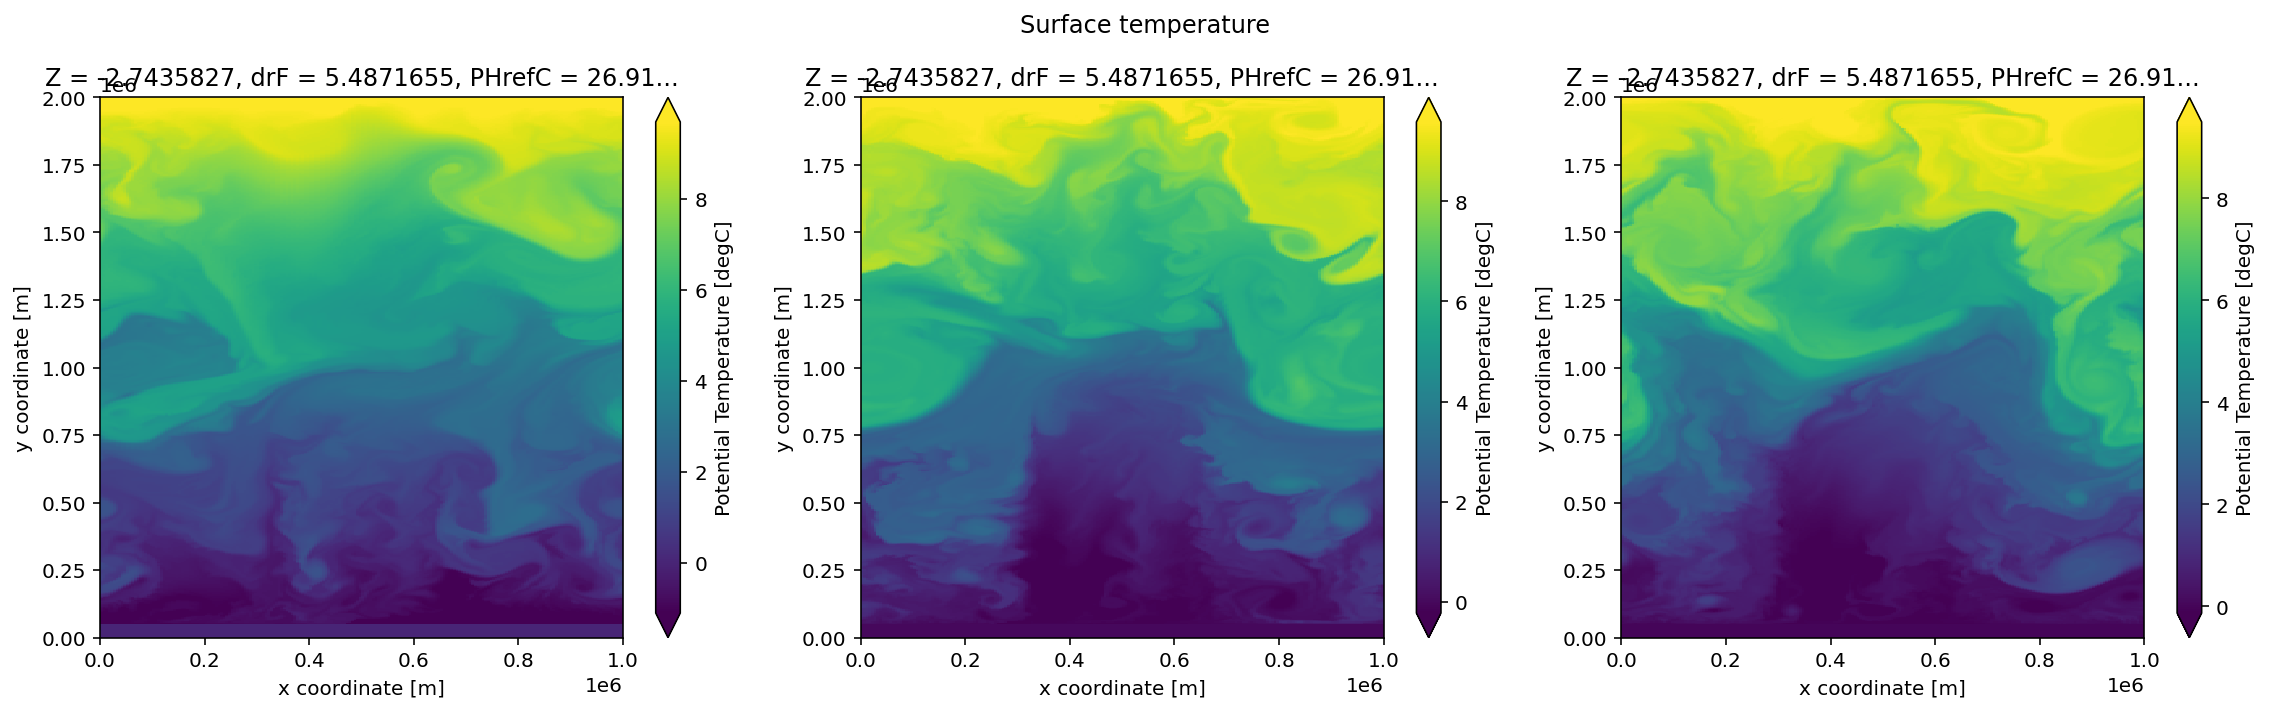

In [13]:
fig1 = plt.figure(tight_layout=True, figsize=(16, 5))
fig1.suptitle("Surface temperature")
spec1 = gridspec.GridSpec(ncols=3, nrows=1, figure=fig1)
f1_ax1 = fig1.add_subplot(spec1[0, 0])
f1_ax2 = fig1.add_subplot(spec1[0, 1])
f1_ax3 = fig1.add_subplot(spec1[0, 2])

ds.THETA.isel(time=0, Z=0).plot(ax=f1_ax1, robust=True, center=False)
ds.THETA.isel(time=35, Z=0).plot(ax=f1_ax2, robust=True, center=False)
ds.THETA.isel(time=-1, Z=0).plot(ax=f1_ax3, robust=True, center=False)
plt.show()

In [7]:
print("Minimum surface temperature:", ds.THETA.isel(time=-1, Z=0).min().compute().data)
print("Maximum surface temperature:", ds.THETA.isel(time=-1, Z=0).max().compute().data)

Minimum surface temperature: -0.34724557
Maximum surface temperature: 9.932025


## XY

### Velocities

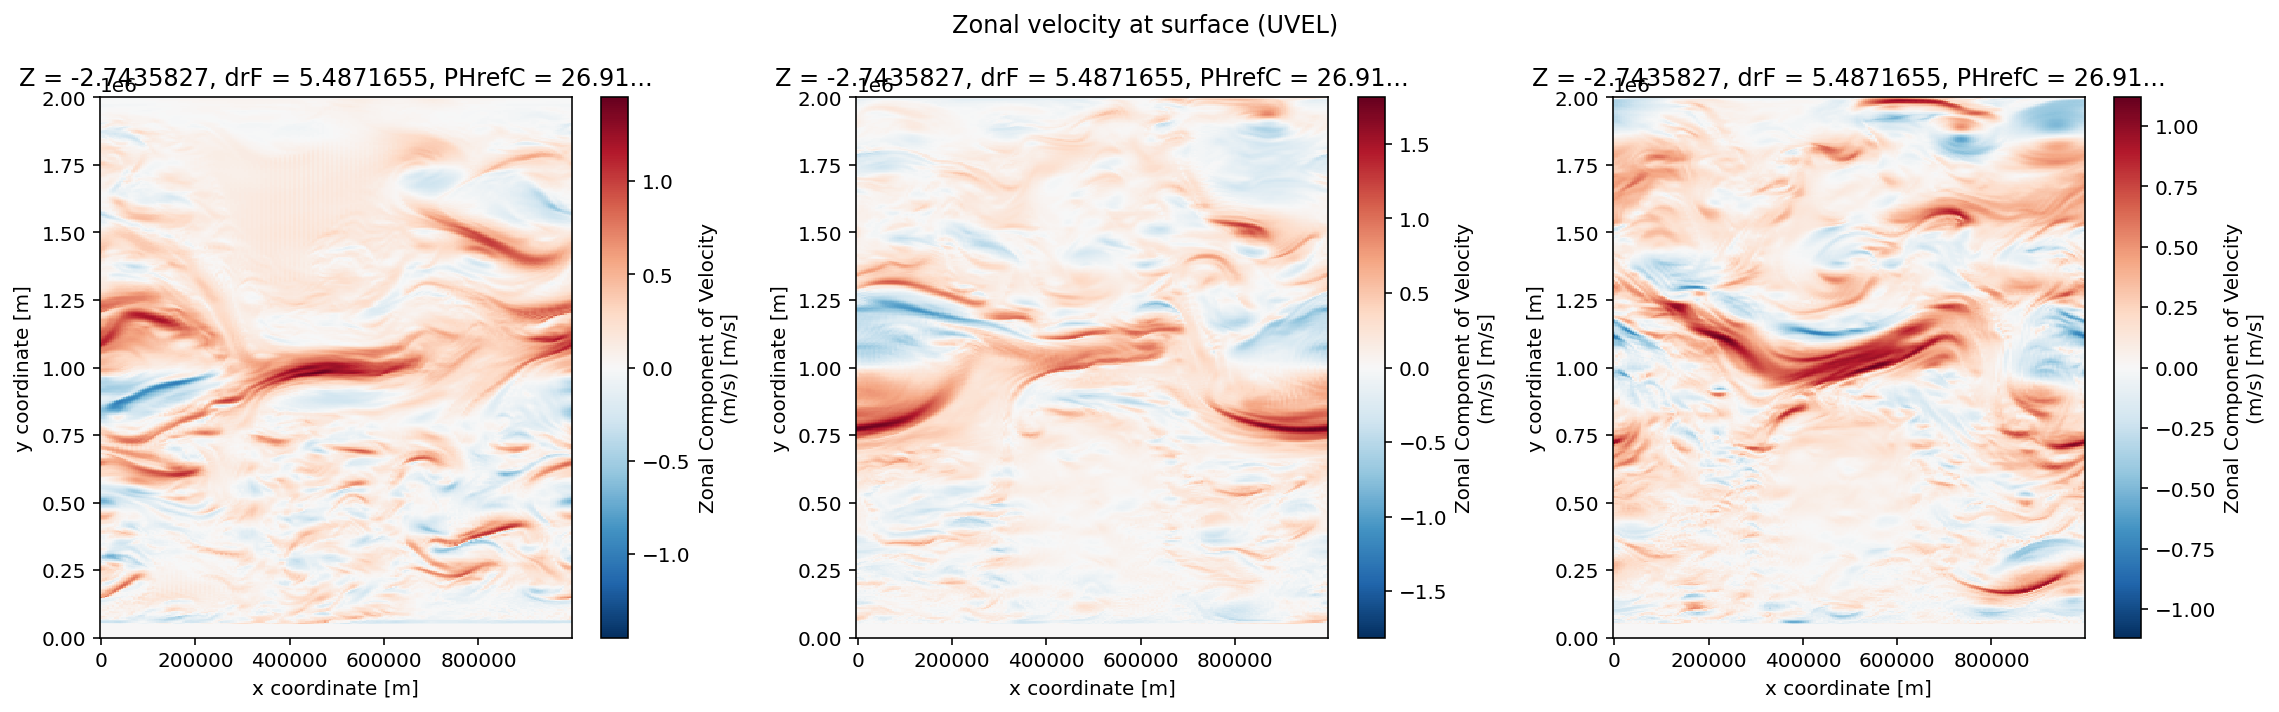

In [8]:
fig1 = plt.figure(tight_layout=True, figsize=(16, 5))
fig1.suptitle("Zonal velocity at surface (UVEL)")
spec1 = gridspec.GridSpec(ncols=3, nrows=1, figure=fig1)
f1_ax1 = fig1.add_subplot(spec1[0, 0])
f1_ax2 = fig1.add_subplot(spec1[0, 1])
f1_ax3 = fig1.add_subplot(spec1[0, 2])

ds.UVEL.isel(time=0, Z=0).plot(ax=f1_ax1,)
ds.UVEL.isel(time=35, Z=0).plot(ax=f1_ax2,)
ds.UVEL.isel(time=-1, Z=0).plot(ax=f1_ax3,)
plt.show()

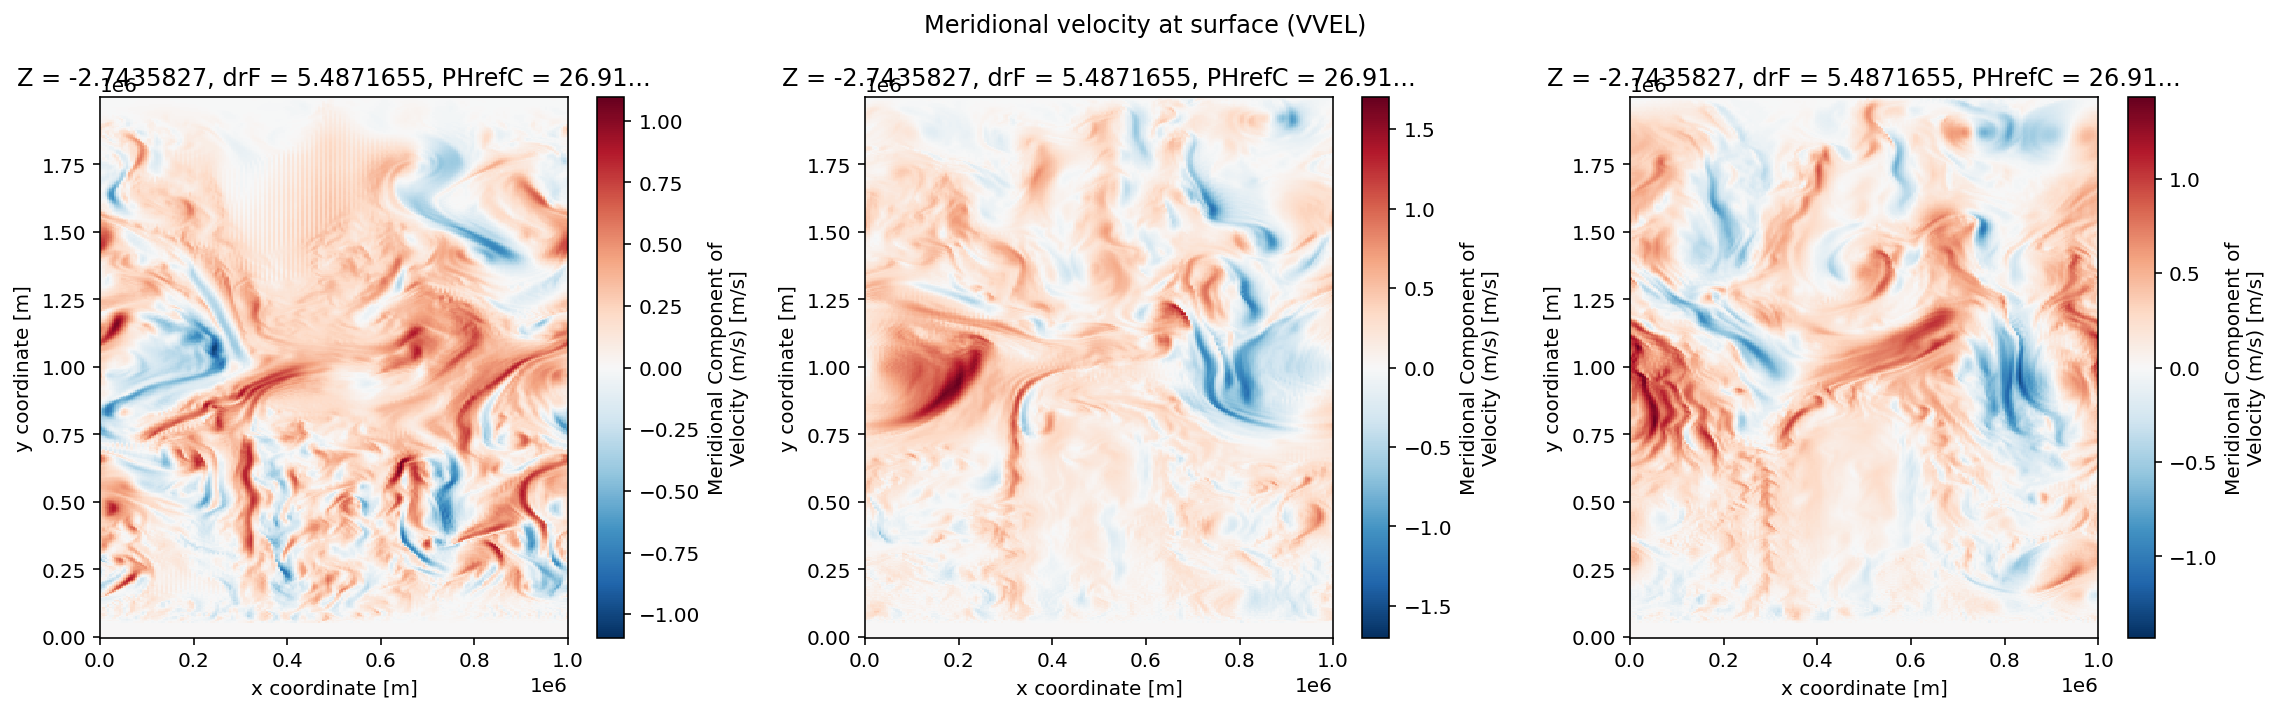

In [9]:
fig1 = plt.figure(tight_layout=True, figsize=(16, 5))
fig1.suptitle("Meridional velocity at surface (VVEL)")
spec1 = gridspec.GridSpec(ncols=3, nrows=1, figure=fig1)
f1_ax1 = fig1.add_subplot(spec1[0, 0])
f1_ax2 = fig1.add_subplot(spec1[0, 1])
f1_ax3 = fig1.add_subplot(spec1[0, 2])

ds.VVEL.isel(time=0, Z=0).plot(ax=f1_ax1,)
ds.VVEL.isel(time=35, Z=0).plot(ax=f1_ax2,)
ds.VVEL.isel(time=-1, Z=0).plot(ax=f1_ax3,)
plt.show()

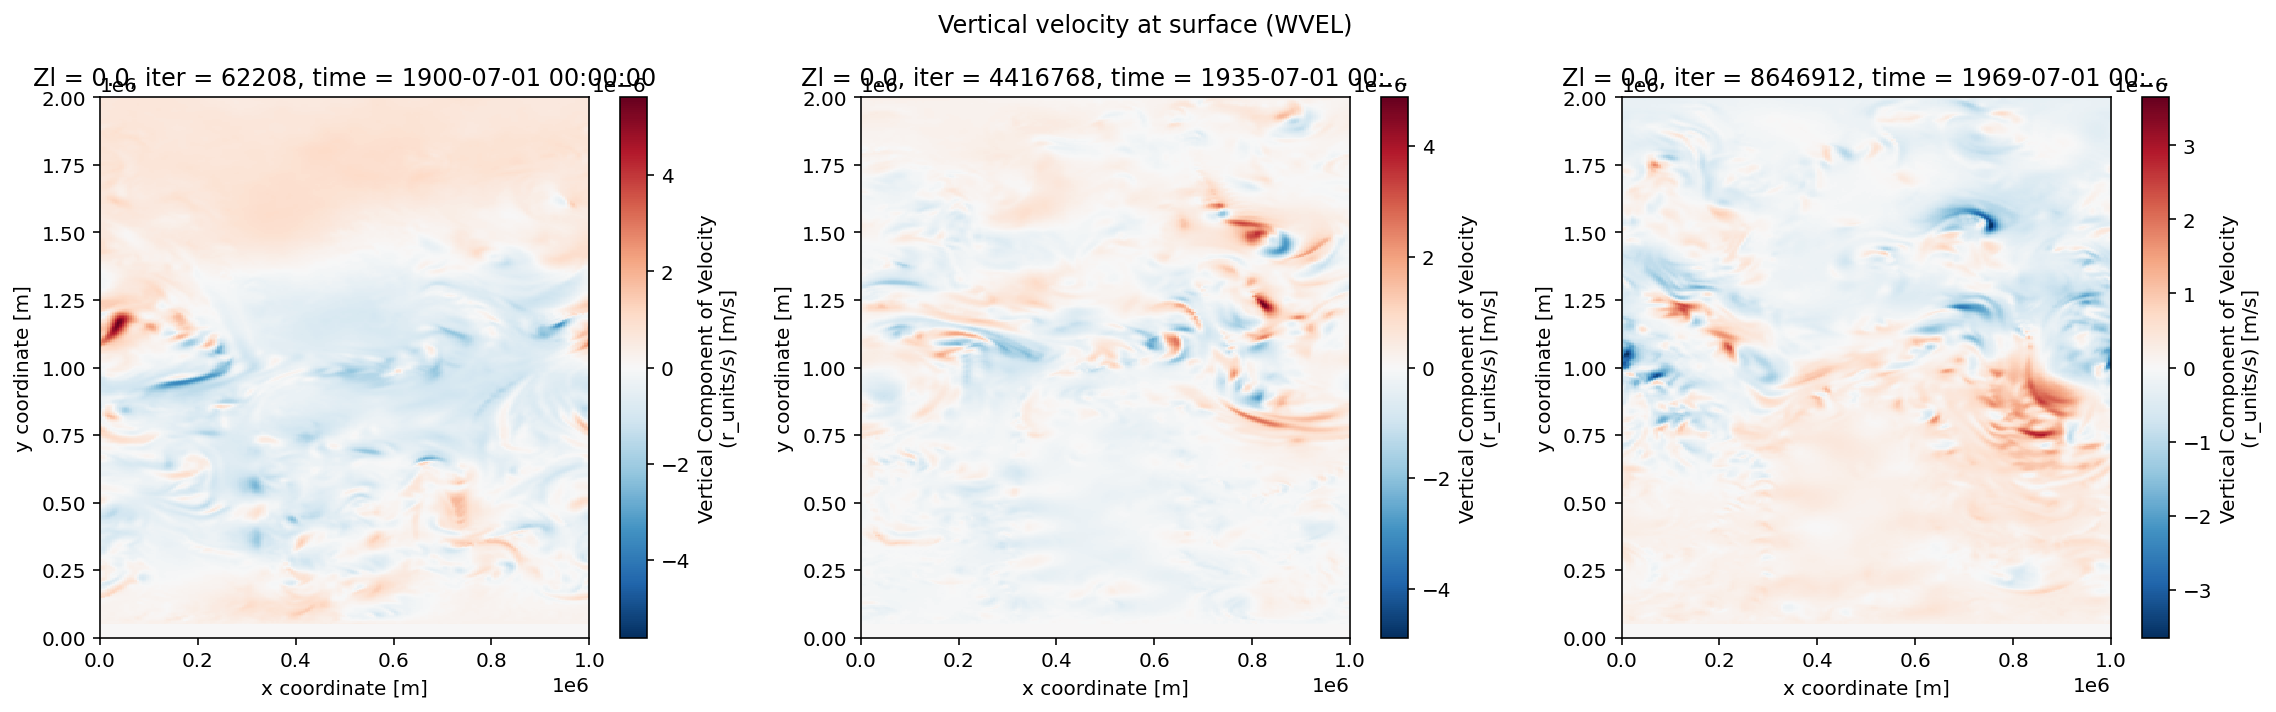

In [10]:
fig1 = plt.figure(tight_layout=True, figsize=(16, 5))
fig1.suptitle("Vertical velocity at surface (WVEL)")
spec1 = gridspec.GridSpec(ncols=3, nrows=1, figure=fig1)
f1_ax1 = fig1.add_subplot(spec1[0, 0])
f1_ax2 = fig1.add_subplot(spec1[0, 1])
f1_ax3 = fig1.add_subplot(spec1[0, 2])

ds.WVEL.isel(time=0, Zl=0).plot(ax=f1_ax1,)
ds.WVEL.isel(time=35, Zl=0).plot(ax=f1_ax2,)
ds.WVEL.isel(time=-1, Zl=0).plot(ax=f1_ax3,)
plt.show()

### Mixed-layer depth

/home/daanr/miniconda3/envs/oceanography/lib/python3.9/site-packages/xarray/plot/utils.py:624: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = fig.colorbar(primitive, **cbar_kwargs)


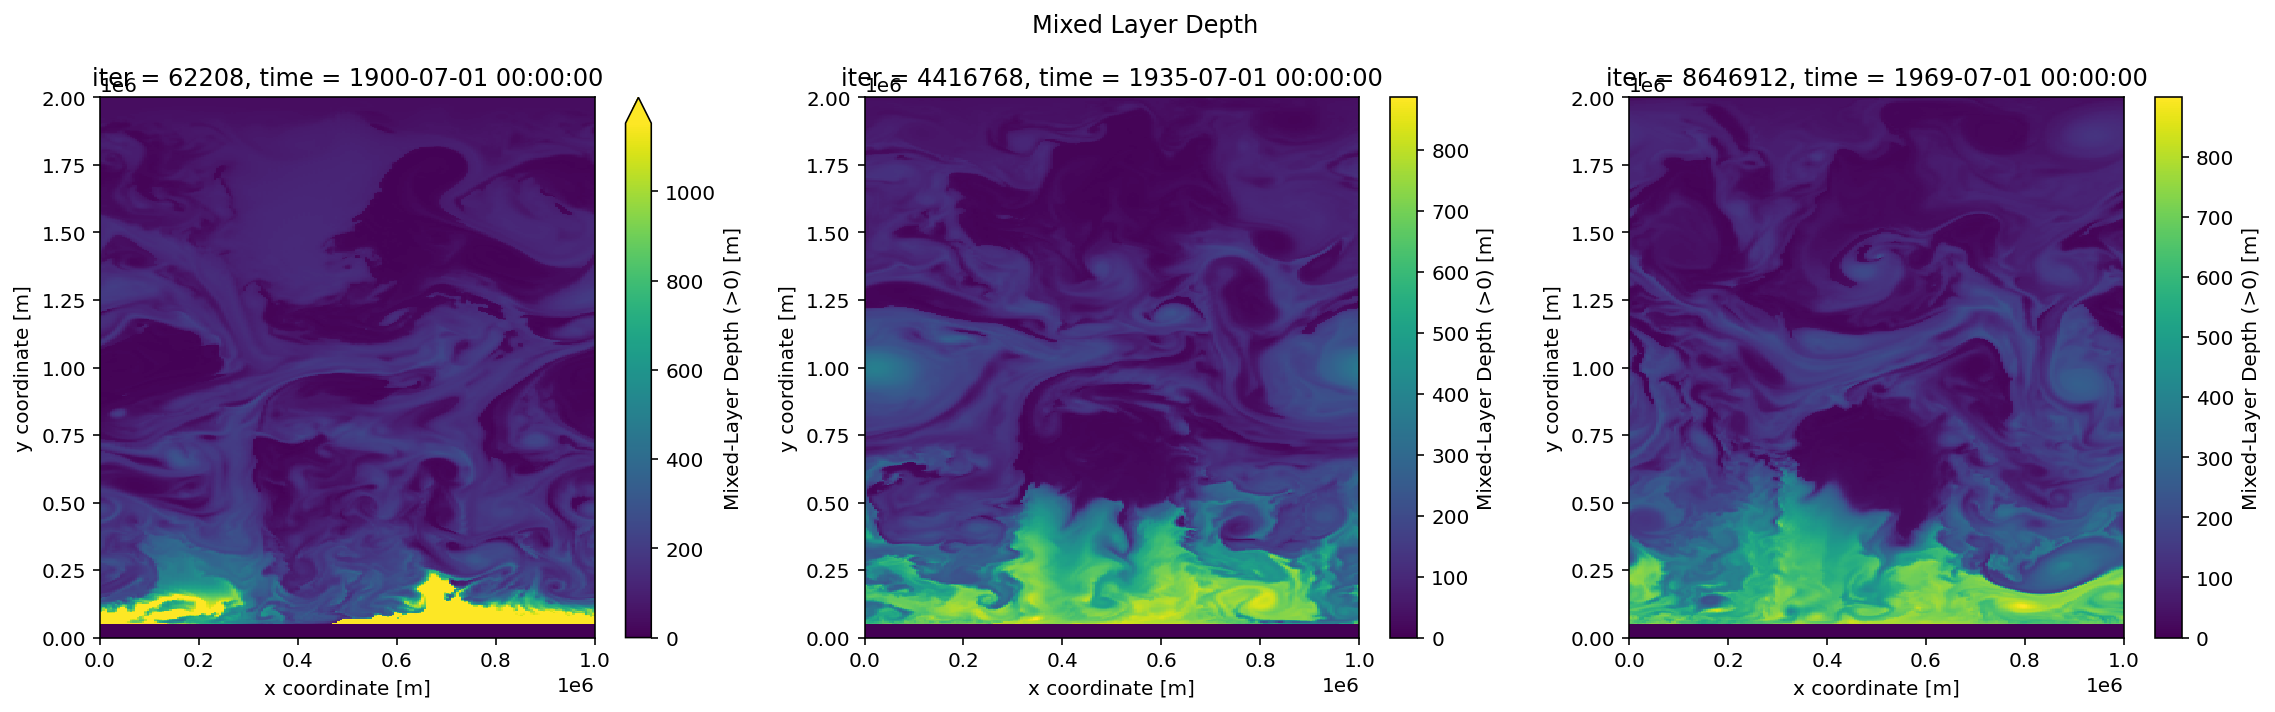

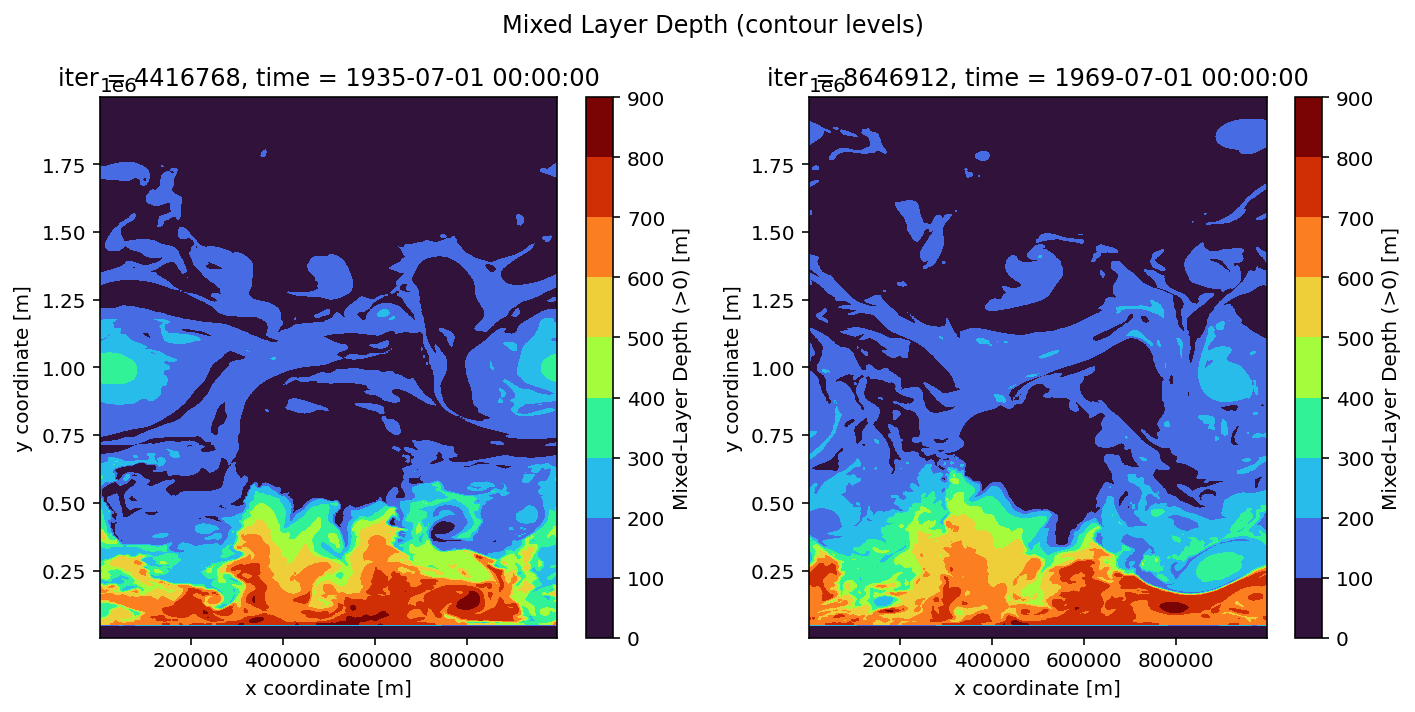

In [12]:
fig1 = plt.figure(tight_layout=True, figsize=(16, 5))
fig1.suptitle("Mixed Layer Depth")
spec1 = gridspec.GridSpec(ncols=3, nrows=1, figure=fig1)
f1_ax1 = fig1.add_subplot(spec1[0, 0])
f1_ax2 = fig1.add_subplot(spec1[0, 1])
f1_ax3 = fig1.add_subplot(spec1[0, 2])

ds.MXLDEPTH.isel(time=0).plot(ax=f1_ax1, robust=True)
ds.MXLDEPTH.isel(time=35).plot(ax=f1_ax2)
ds.MXLDEPTH.isel(time=-1).plot(ax=f1_ax3)

fig2 = plt.figure(tight_layout=True, figsize=(10, 5))
fig2.suptitle("Mixed Layer Depth (contour levels)")
spec2 = gridspec.GridSpec(ncols=2, nrows=1, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[0, 1])

ds.MXLDEPTH.isel(time=35).plot.contourf(
    ax=f2_ax1, levels=np.arange(0, 1000, 100), cmap="turbo"
)
ds.MXLDEPTH.isel(time=-1).plot.contourf(
    ax=f2_ax2, levels=np.arange(0, 1000, 100), cmap="turbo"
)
plt.show()

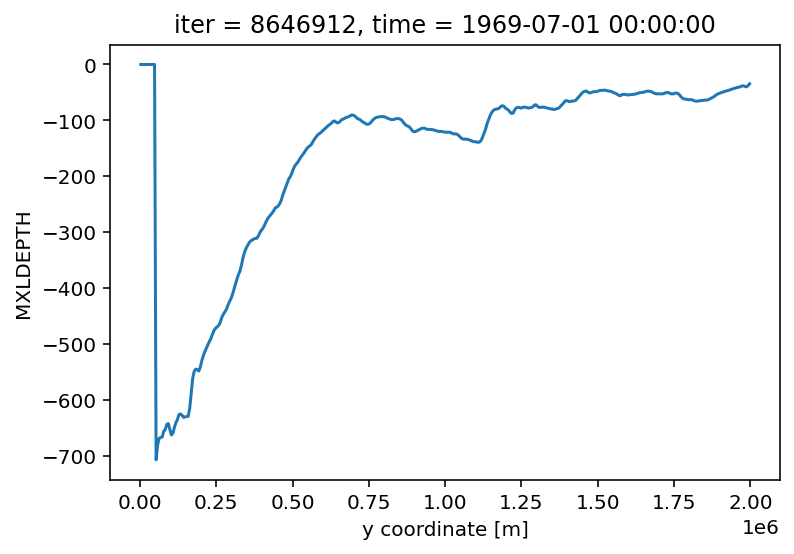

In [13]:
(-ds.MXLDEPTH).isel(time=-1).mean('XC').plot()
plt.show()

### Surface Elevation

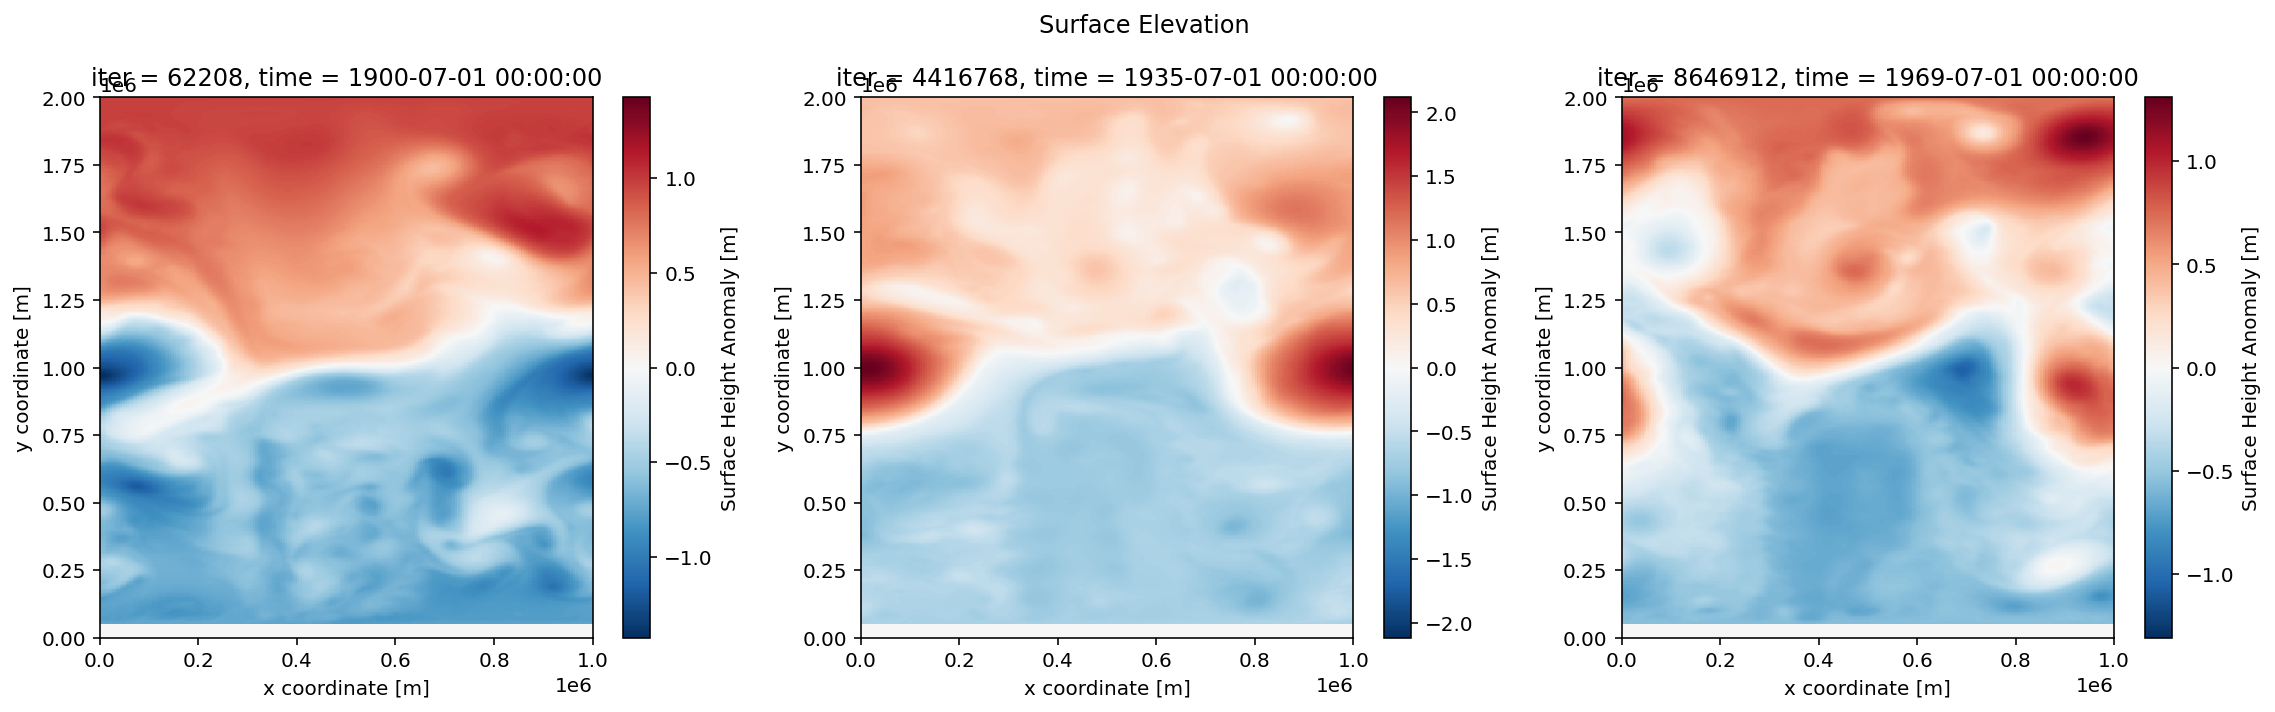

In [14]:
fig1 = plt.figure(tight_layout=True, figsize=(16, 5))
fig1.suptitle("Surface Elevation")
spec1 = gridspec.GridSpec(ncols=3, nrows=1, figure=fig1)
f1_ax1 = fig1.add_subplot(spec1[0, 0])
f1_ax2 = fig1.add_subplot(spec1[0, 1])
f1_ax3 = fig1.add_subplot(spec1[0, 2])

ds.ETAN.isel(time=0).plot(ax=f1_ax1)
ds.ETAN.isel(time=35).plot(ax=f1_ax2)
ds.ETAN.isel(time=-1).plot(ax=f1_ax3)
plt.show()

### Kinetic Energy

In [15]:
ds["VolumeTracer"] = ds.drF * ds.rA * ds.hFacC

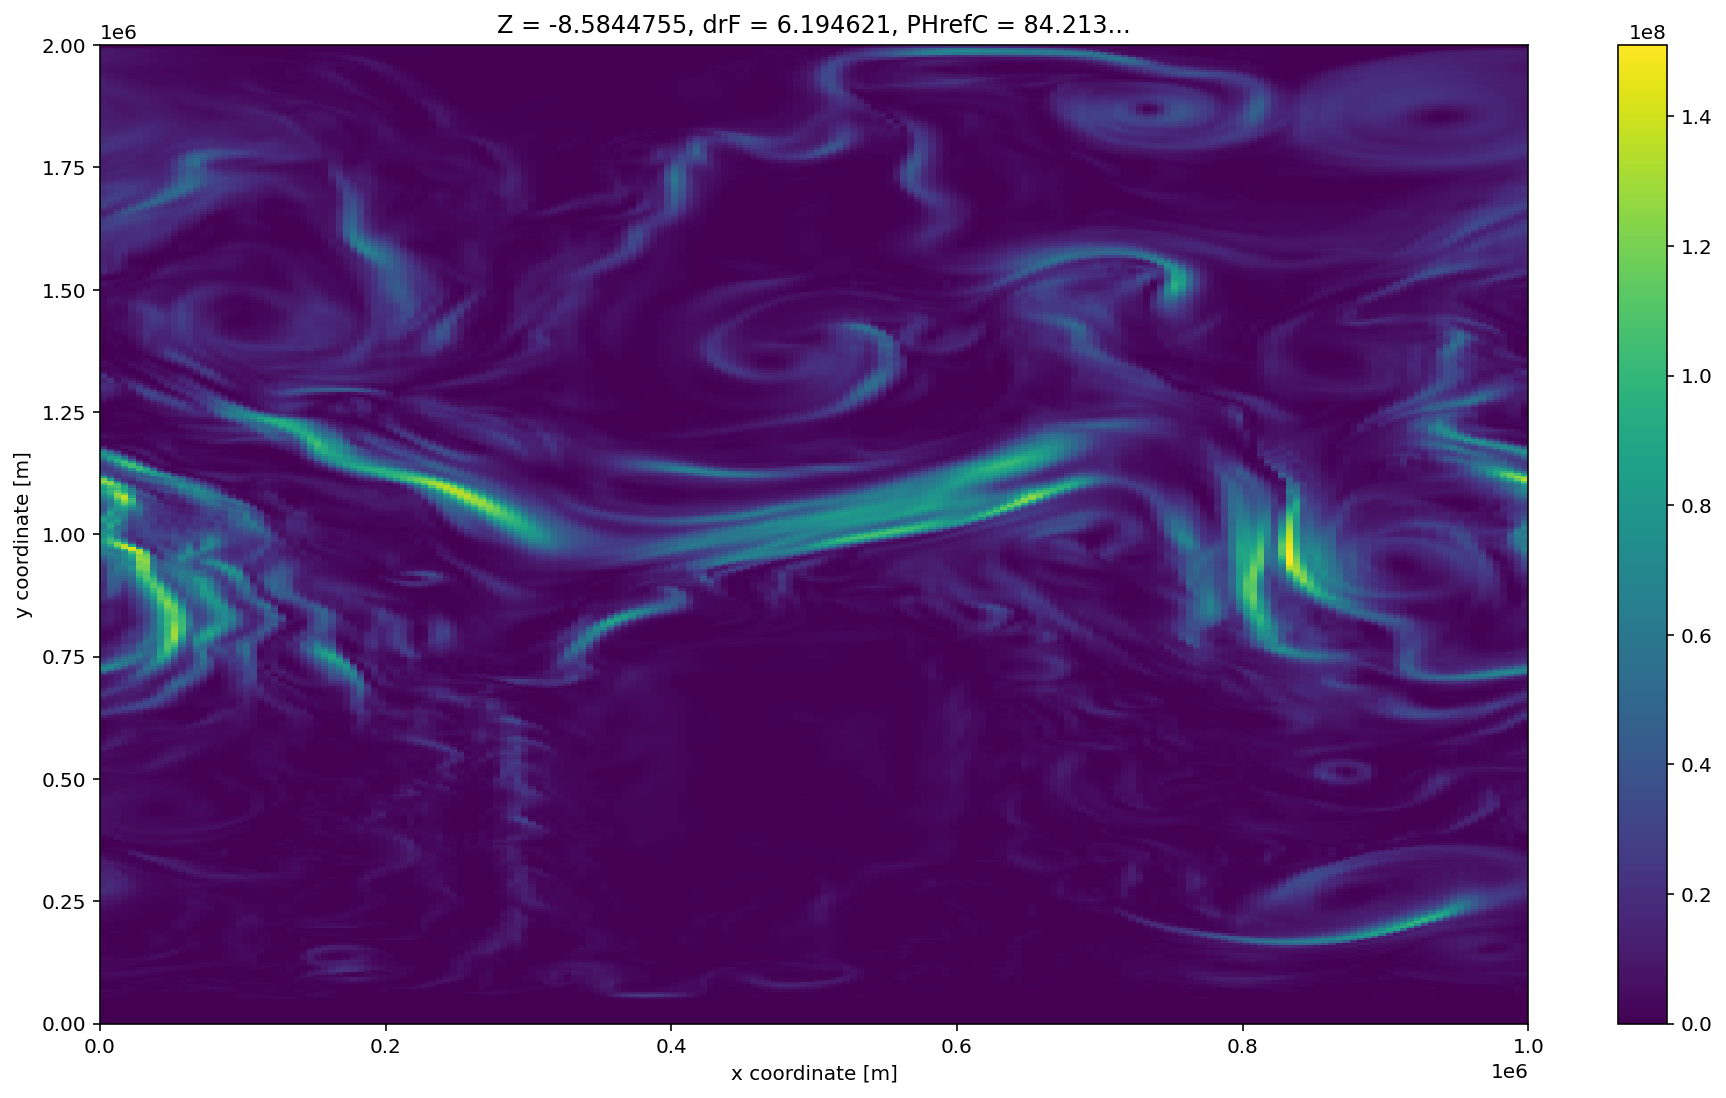

In [16]:
ke = 0.5 * ds.VolumeTracer * (
    + grid.interp(ds.UVEL, "X")**2
    + grid.interp(ds.VVEL, "Y")**2
#     + grid.interp(ds.WVEL, "Z")**2  # Not necessary in hydrostatic mode
)
ke.isel(time=-1, Z=1).plot.pcolormesh(figsize=(16,9))

## 3D variables
### Potential Temperature 

/home/daanr/miniconda3/envs/oceanography/lib/python3.9/site-packages/xarray/plot/utils.py:624: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = fig.colorbar(primitive, **cbar_kwargs)
/home/daanr/miniconda3/envs/oceanography/lib/python3.9/site-packages/xarray/plot/utils.py:624: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = fig.colorbar(primitive, **cbar_kwargs)
/home/daanr/miniconda3/envs/oceanography/lib/python3.9/site-packages/xarray/plot/utils.py:624: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = fig.colorbar(primitive, **cb

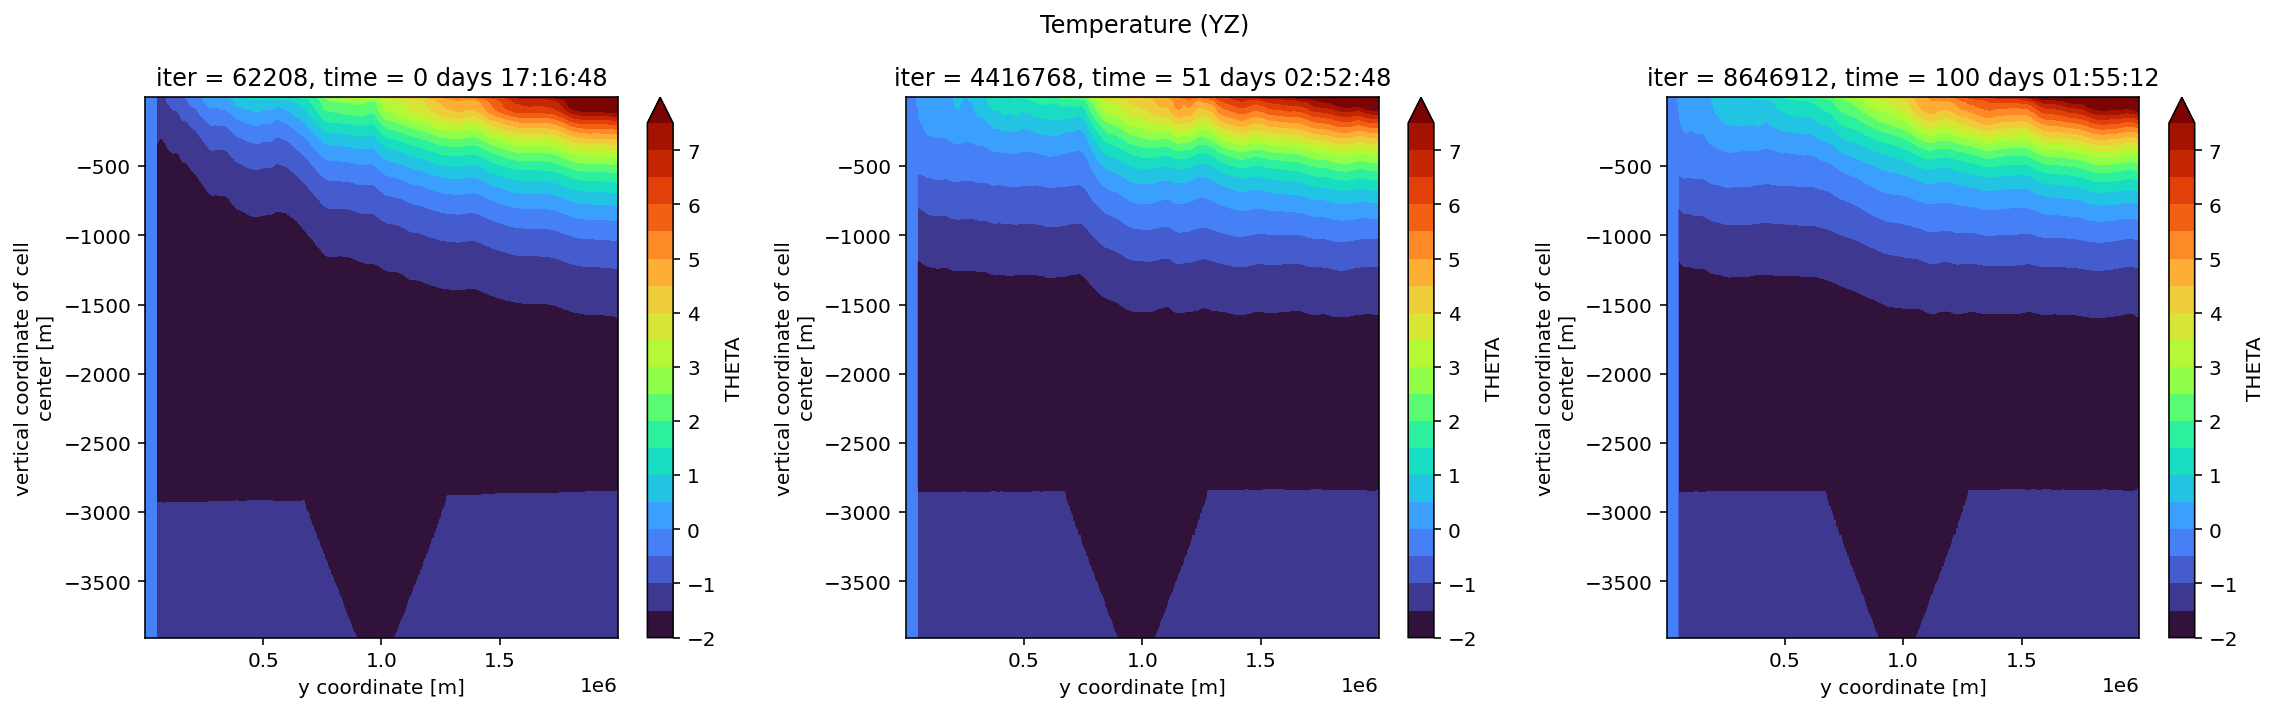

In [14]:
fig1 = plt.figure(tight_layout=True, figsize=(16, 5))
fig1.suptitle("Temperature (YZ)")
spec1 = gridspec.GridSpec(ncols=3, nrows=1, figure=fig1)
f1_ax1 = fig1.add_subplot(spec1[0, 0])
f1_ax2 = fig1.add_subplot(spec1[0, 1])
f1_ax3 = fig1.add_subplot(spec1[0, 2])

ds.THETA.isel(time=0).mean("XC").plot.contourf(
    ax=f1_ax1, levels=np.arange(-2, 8, 0.5), cmap="turbo"
)
ds.THETA.isel(time=35).mean("XC").plot.contourf(
    ax=f1_ax2, levels=np.arange(-2, 8, 0.5), cmap="turbo"
)
ds.THETA.isel(time=-1).mean("XC").plot.contourf(
    ax=f1_ax3, levels=np.arange(-2, 8, 0.5), cmap="turbo"
)
plt.show()

### Velocities

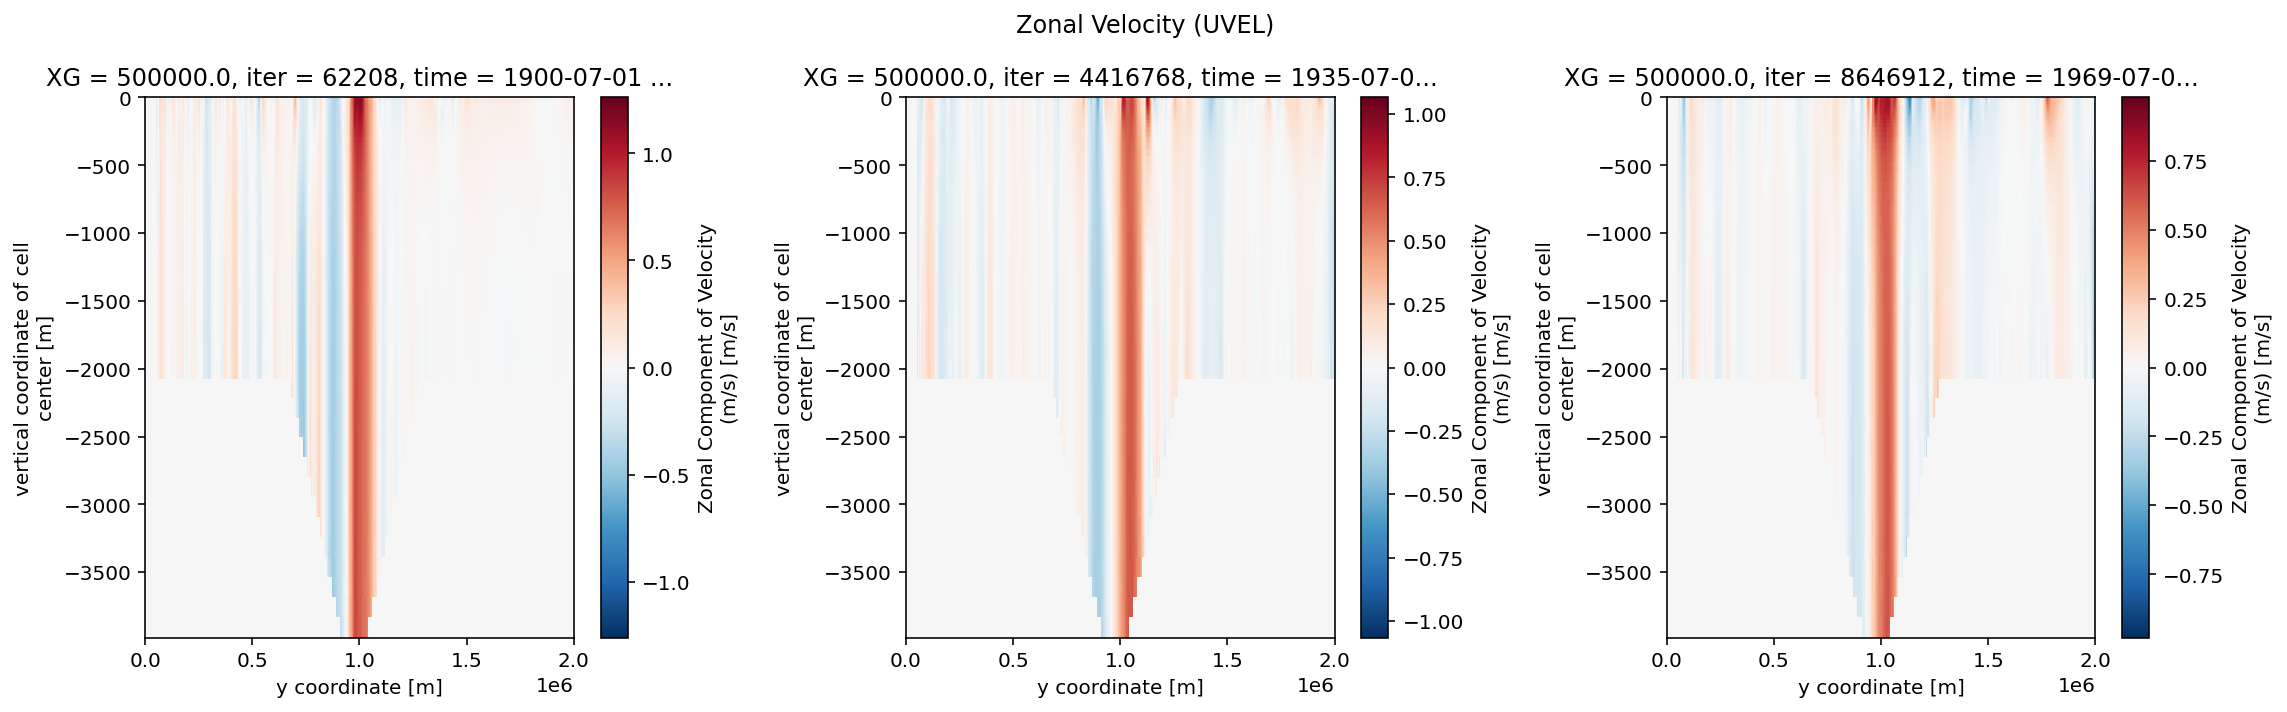

In [18]:
fig1 = plt.figure(tight_layout=True, figsize=(16, 5))
fig1.suptitle("Zonal Velocity (UVEL)")
spec1 = gridspec.GridSpec(ncols=3, nrows=1, figure=fig1)
f1_ax1 = fig1.add_subplot(spec1[0, 0])
f1_ax2 = fig1.add_subplot(spec1[0, 1])
f1_ax3 = fig1.add_subplot(spec1[0, 2])

ds.UVEL.isel(time=0, XG=100).plot(ax=f1_ax1)
ds.UVEL.isel(time=35, XG=100).plot(ax=f1_ax2)
ds.UVEL.isel(time=-1, XG=100).plot(ax=f1_ax3)
plt.show()

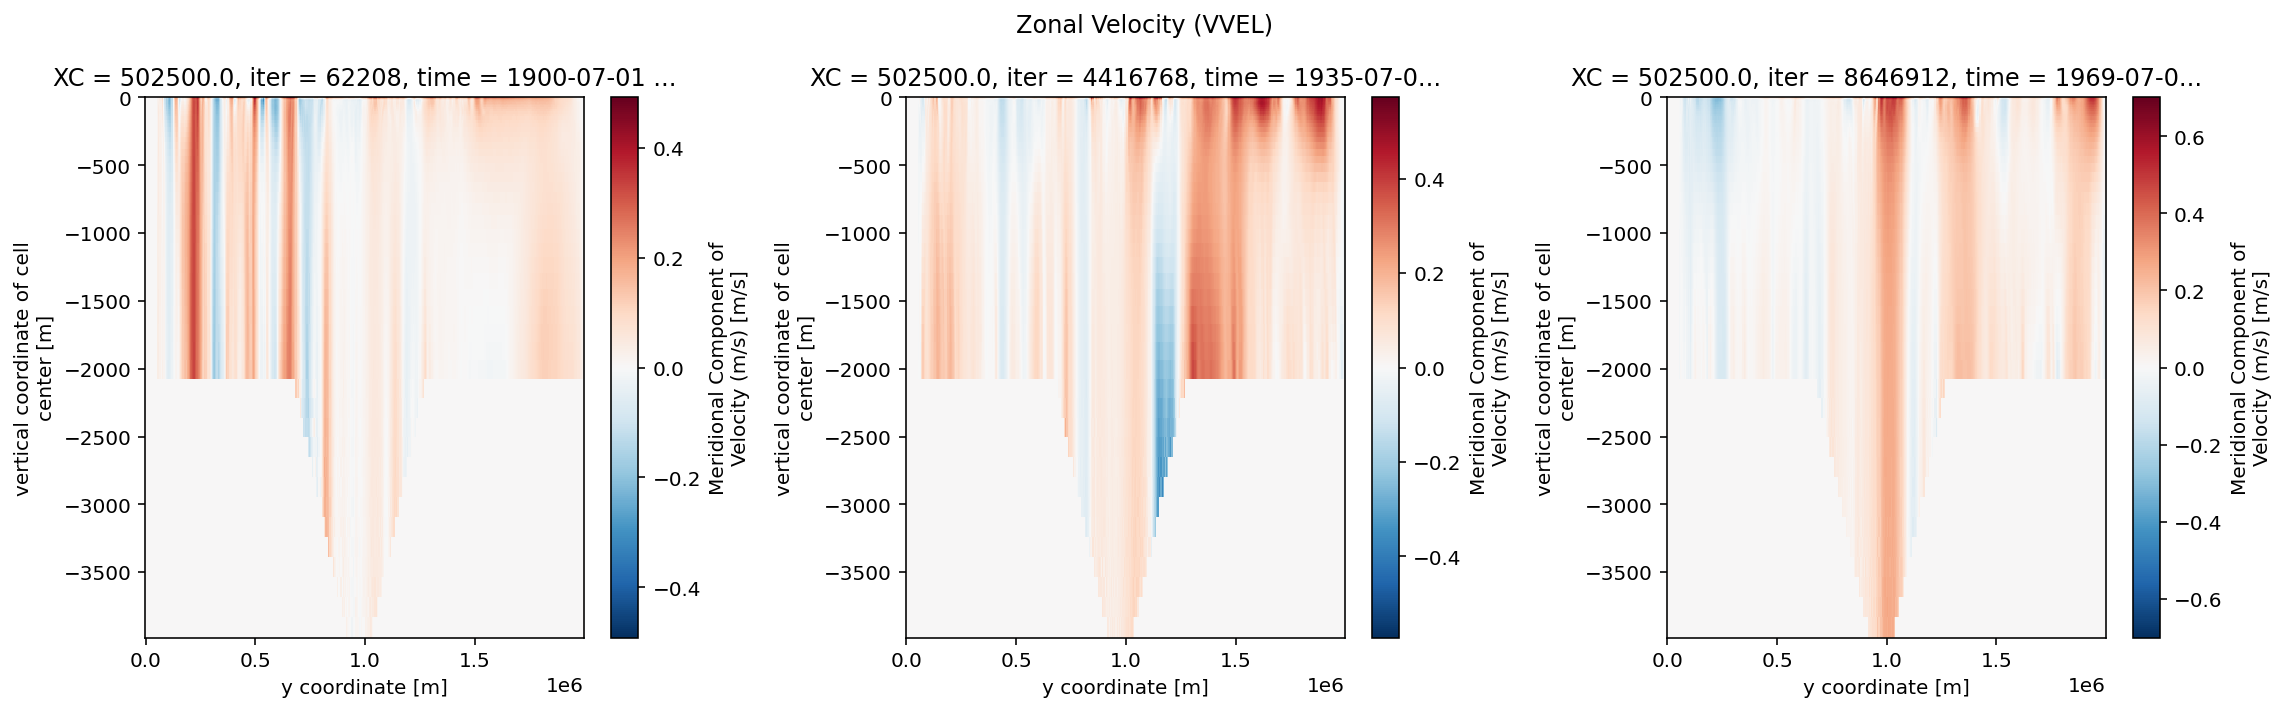

In [19]:
fig1 = plt.figure(tight_layout=True, figsize=(16, 5))
fig1.suptitle("Zonal Velocity (VVEL)")
spec1 = gridspec.GridSpec(ncols=3, nrows=1, figure=fig1)
f1_ax1 = fig1.add_subplot(spec1[0, 0])
f1_ax2 = fig1.add_subplot(spec1[0, 1])
f1_ax3 = fig1.add_subplot(spec1[0, 2])

ds.VVEL.isel(time=0, XC=100).plot(ax=f1_ax1)
ds.VVEL.isel(time=35, XC=100).plot(ax=f1_ax2)
ds.VVEL.isel(time=-1, XC=100).plot(ax=f1_ax3)
plt.show()

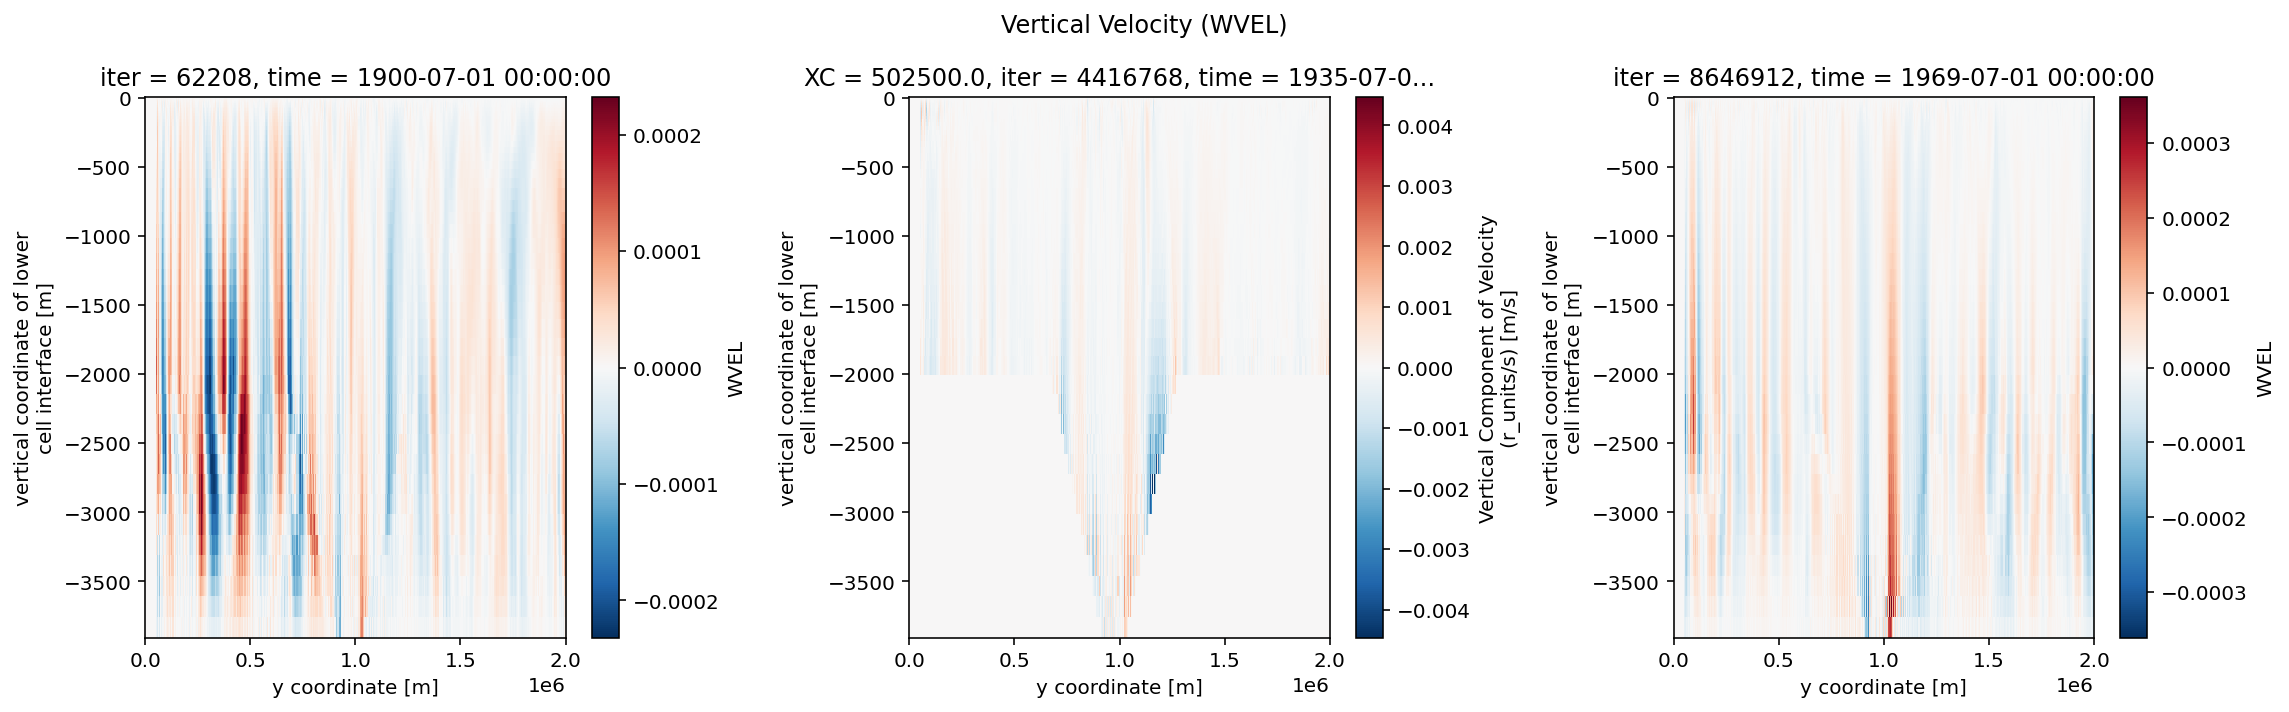

In [20]:
fig1 = plt.figure(tight_layout=True, figsize=(16, 5))
fig1.suptitle("Vertical Velocity (WVEL)")
spec1 = gridspec.GridSpec(ncols=3, nrows=1, figure=fig1)
f1_ax1 = fig1.add_subplot(spec1[0, 0])
f1_ax2 = fig1.add_subplot(spec1[0, 1])
f1_ax3 = fig1.add_subplot(spec1[0, 2])

ds.WVEL.isel(time=0).mean(dim='XC').plot(ax=f1_ax1)
ds.WVEL.isel(time=35, XC=100).plot(ax=f1_ax2)
ds.WVEL.isel(time=-1).mean(dim='XC').plot(ax=f1_ax3)
plt.show()

In [21]:
for veloType in ["UVEL", "VVEL", "WVEL"]:
    print(f"Minimum {veloType}:", ds[veloType].isel(time=-1).min().compute().data)
    print(f"Maximum {veloType}:", ds[veloType].isel(time=-1).max().compute().data)
    if veloType != "WVEL":
        print(
            f"Mean {veloType} (at top 15 layers):",
            ds[veloType].isel(time=-1, Z=slice(0, 15)).mean().compute().data,
        )
        print(
            f"Std({veloType}) (at top 15 layers):",
            np.std(ds[veloType].isel(time=-1, Z=slice(0, 15))).mean().compute().data,
        )
    else:
        print(
            f"Mean {veloType} (at top 15 layers):",
            ds[veloType].isel(time=-1, Zl=slice(0, 15)).mean().compute().data,
        )
        print(
            f"Std({veloType}) (at top 15 layers):",
            np.std(ds[veloType].isel(time=-1, Zl=slice(0, 15))).mean().compute().data,
        )
    print("----------")

Minimum UVEL: -0.8957652
Maximum UVEL: 1.1179224
Mean UVEL (at top 15 layers): 0.047390122
Std(UVEL) (at top 15 layers): 0.1964301
----------
Minimum VVEL: -1.443494
Maximum VVEL: 1.4302421
Mean VVEL (at top 15 layers): 0.011674236
Std(VVEL) (at top 15 layers): 0.26912203
----------
Minimum WVEL: -0.016107688
Maximum WVEL: 0.012656273
Mean WVEL (at top 15 layers): 1.8626451e-14
Std(WVEL) (at top 15 layers): 0.00011052729
----------


Representative Velocities, but WVEL one order of magnitude too large.

# Statistical quantities

## Normalized heat

### Total heat content

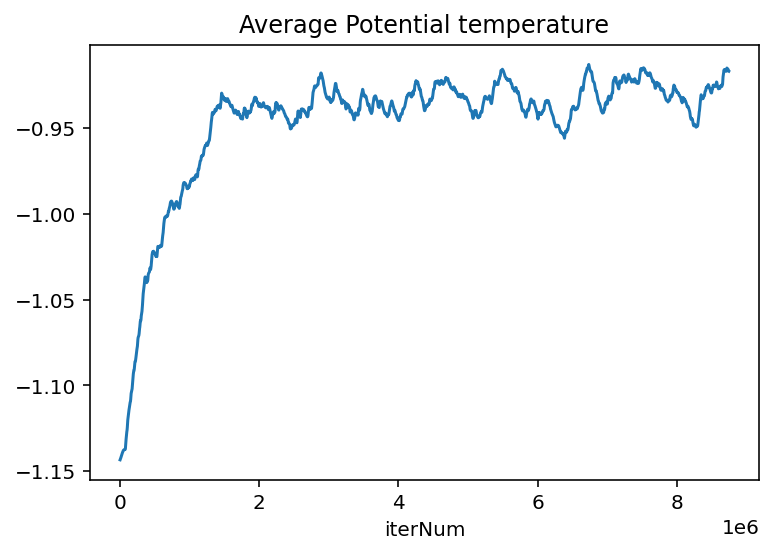

In [22]:
((ds_stats.THETA_avg * ds_stats.volume).sum(dim='RC') / ds_stats.volume.sum(dim='RC')).plot()
plt.title("Average Potential temperature")
plt.show()

### 1500 m depth

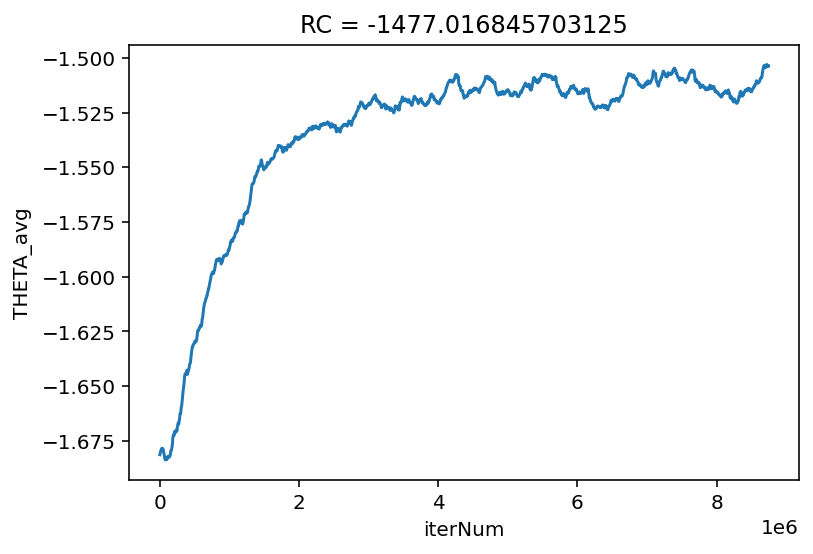

In [23]:
ds_stats.THETA_avg.sel(RC=-1500, method='nearest').plot()

### 3000 m depth

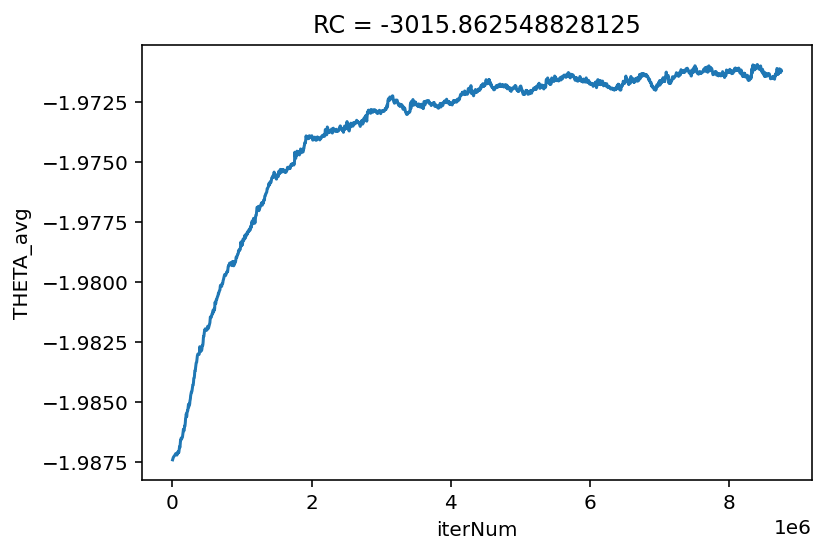

In [24]:
ds_stats.THETA_avg.sel(RC=-3000, method='nearest').plot()

## Surface temperature relaxation

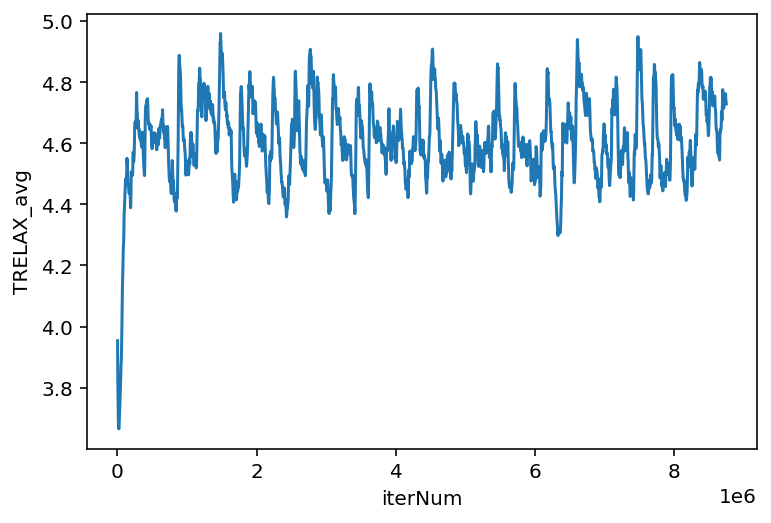

In [25]:
ds_stats.TRELAX_avg.plot()

## Kinetic Energy (top 15 layers)

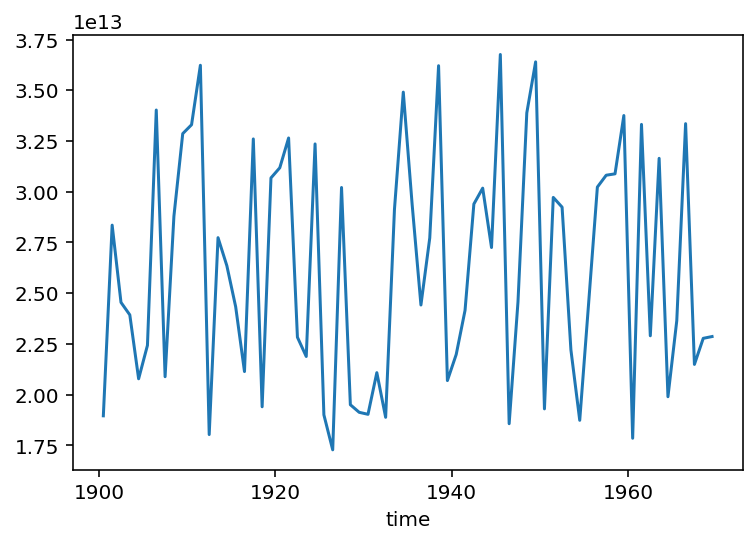

In [47]:
ke.isel(Z=slice(0,15)).sum(['Z', 'YC', 'XC']).plot()

# Misc

## Smagorisnky constant

In [30]:
UVEL_surf = ds.UVEL.isel(Z=0)
VVEL_surf = ds.VVEL.isel(Z=0)

In [31]:
dudx = grid.diff(UVEL_surf * ds.dyG, 'X') / ds.rA
dvdy = grid.diff(VVEL_surf * ds.dxG, 'Y') / ds.rA

In [32]:
dudy = grid.diff(UVEL_surf * ds.dxC, 'Y', boundary='fill') / ds.rAz
dvdx = grid.diff(VVEL_surf * ds.dyC, 'X') / ds.rAz

In [33]:
dudy_centered = grid.interp(grid.interp(dudy, "X"), "Y")
dvdx_centered = grid.interp(grid.interp(dvdx, "X"), "Y")

In [34]:
smagnoC = ds.rA * np.sqrt(dudx**2 + 0.5*(dudy_centered + dvdx_centered)**2 + dvdy**2)

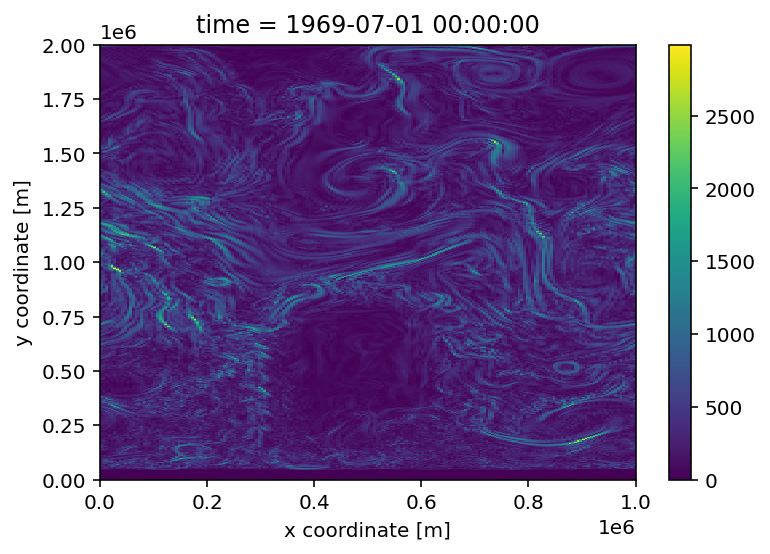

In [35]:
smagnoC.isel(time=-1).plot()

In [36]:
smagnoC.isel(time=-1).mean().compute()

<xarray.DataArray ()>
array(296.48843, dtype=float32)
Coordinates:
    time     object 1969-07-01 00:00:00